In [19]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load the datasets
cleveland_df = pd.read_csv('C:/Users/yeuvi/Documents/MMU Doc/Degree/Sem 2/TML 6223 - Machine Learning/heart_cleveland_D1.csv')

# Display the first few rows of each dataset
print("\nCleveland Dataset:")
cleveland_df.head()


Cleveland Dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
# Check for missing values
print(cleveland_df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [4]:
# For simplicity, let's convert any categorical columns to numerical using one-hot encoding
cleveland_df = pd.get_dummies(cleveland_df)

In [5]:
# Ensure target column is binary
cleveland_df['age'] = (cleveland_df['age'] > 0).astype(int)

In [6]:
# Separate features and target variable
X = cleveland_df.drop('condition', axis=1)
y = cleveland_df['condition']

In [7]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Initialize AdaBoost classifier
adaboost_model = AdaBoostClassifier(random_state=42)

In [10]:
# Train the model
adaboost_model.fit(X_train, y_train)


AdaBoostClassifier(random_state=42)

In [11]:
# Make predictions
y_pred = adaboost_model.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        32
           1       0.63      0.68      0.66        28

    accuracy                           0.67        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.67      0.67      0.67        60



In [20]:
# Model training with hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]}
grid_search = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), algorithm='SAMME'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(class_weight='balanced')),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150]})

In [24]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21 11]
 [10 18]]

True Positives(TP) =  21

True Negatives(TN) =  18

False Positives(FP) =  11

False Negatives(FN) =  10


<Axes: >

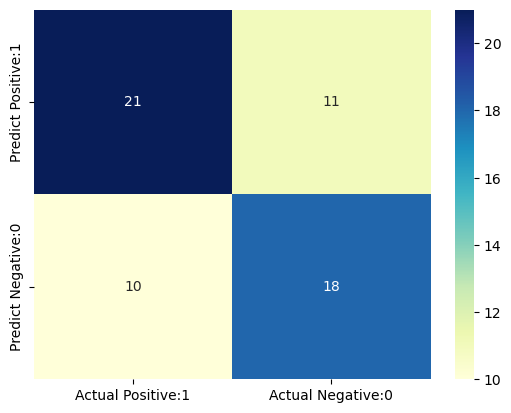

In [25]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')